# Stock Price Predection using LSTM
## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp '/content/drive/MyDrive/Kaggel/kaggle.json' ~/.kaggle

cp: cannot stat '/content/drive/MyDrive/Kaggel/kaggle.json': No such file or directory


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Load The Dataset

In [ ]:
dataset_path = "/content/AMZN.csv"

In [ ]:
df = pd.read_csv(dataset_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')
data = df['Close'].values.reshape(-1, 1)

## Plot stock prices

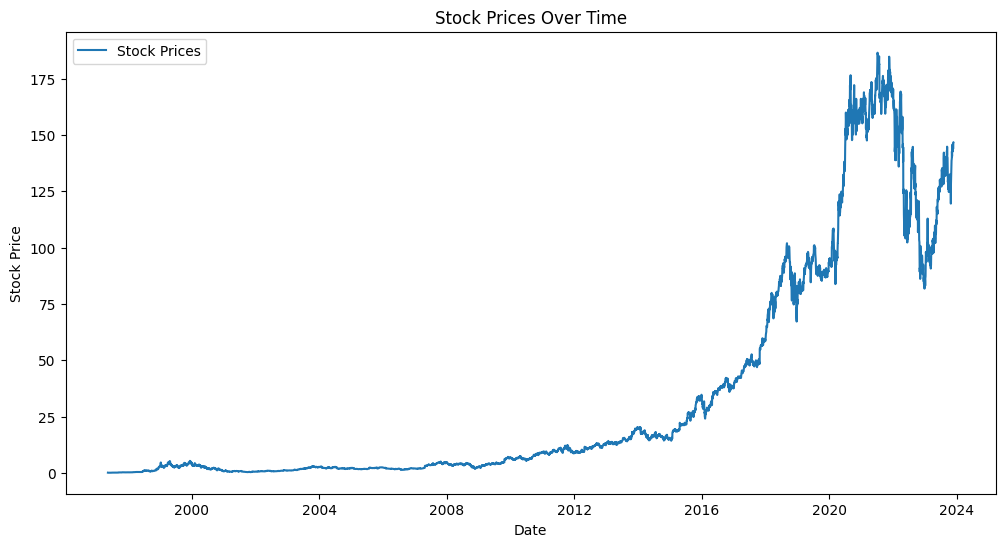

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Prices')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [ ]:
# Create sequences
sequence_length = 10
sequences = []
for i in range(len(data_scaled) - sequence_length):
    sequences.append(data_scaled[i:i + sequence_length, 0])

In [ ]:
# Convert sequences to numpy array
sequences = np.array(sequences)

In [ ]:
# Split into train, validation, and test sets
train_size = int(len(sequences) * 0.7)
val_size = int(len(sequences) * 0.15)
train, val, test = sequences[:train_size], sequences[train_size:train_size+val_size], sequences[train_size+val_size:]

In [ ]:
# Prepare input and output
def prepare_data(sequence_data):
    X = sequence_data[:, :-1]
    y = sequence_data[:, -1]
    return X, y

In [ ]:
X_train, y_train = prepare_data(train)
X_val, y_val = prepare_data(val)
X_test, y_test = prepare_data(test)

In [ ]:
# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
146/146 [==============================] - 4s 11ms/step - loss: 1.3846e-04 - val_loss: 2.7663e-04
Epoch 2/50
146/146 [==============================] - 1s 8ms/step - loss: 3.8483e-06 - val_loss: 4.1602e-04
Epoch 3/50
146/146 [==============================] - 1s 8ms/step - loss: 3.9041e-06 - val_loss: 2.5900e-04
Epoch 4/50
146/146 [==============================] - 1s 8ms/step - loss: 3.6339e-06 - val_loss: 2.0310e-04
Epoch 5/50
146/146 [==============================] - 1s 9ms/step - loss: 4.1767e-06 - val_loss: 4.8145e-04
Epoch 6/50
146/146 [==============================] - 2s 11ms/step - loss: 3.9444e-06 - val_loss: 2.2478e-04
Epoch 7/50
146/146 [==============================] - 2s 11ms/step - loss: 4.0375e-06 - val_loss: 2.4822e-04
Epoch 8/50
146/146 [==============================] - 1s 9ms/step - loss: 3.8415e-06 - val_loss: 3.1982e-04
Epoch 9/50
146/146 [==============================] - 1s 7ms/step - loss: 3.8153e-06 - val_loss: 1.3986e-04
Epoch 10/50
146/146 [====

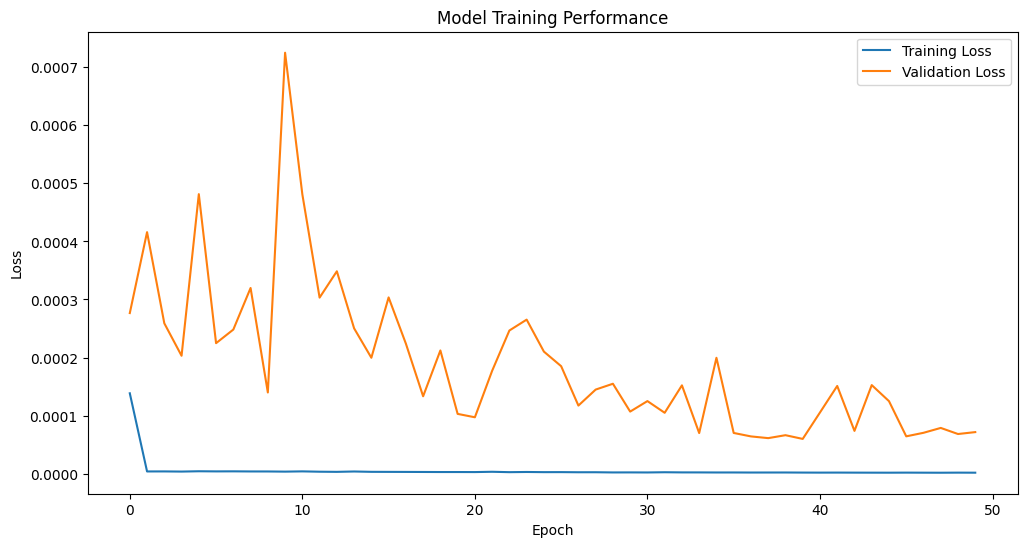

In [ ]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [ ]:
# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
val_predictions = scaler.inverse_transform(val_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
val_rmse = np.sqrt(mean_squared_error(y_val_actual, val_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.21190705510385657
Validation RMSE: 1.5781896047687367
Test RMSE: 4.28340035206113


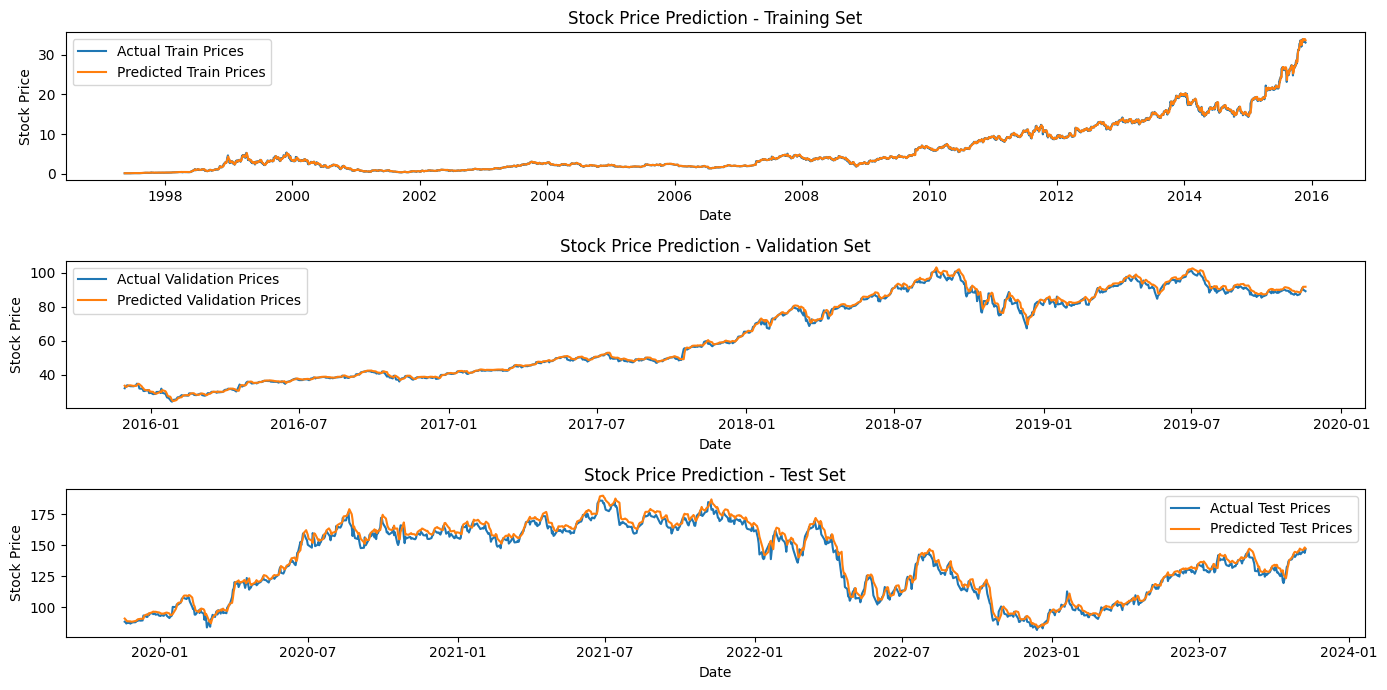

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(df.index[:len(train_predictions)], y_train_actual, label='Actual Train Prices')
plt.plot(df.index[:len(train_predictions)], train_predictions, label='Predicted Train Prices')
plt.title('Stock Price Prediction - Training Set')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index[len(train_predictions):len(train_predictions)+len(val_predictions)], y_val_actual, label='Actual Validation Prices')
plt.plot(df.index[len(train_predictions):len(train_predictions)+len(val_predictions)], val_predictions, label='Predicted Validation Prices')
plt.title('Stock Price Prediction - Validation Set')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(3, 1, 3)
test_index = df.index[len(train_predictions)+len(val_predictions):len(train_predictions)+len(val_predictions)+len(test_predictions)]
plt.plot(test_index, y_test_actual, label='Actual Test Prices')
plt.plot(test_index, test_predictions, label='Predicted Test Prices')
plt.title('Stock Price Prediction - Test Set')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()